## Esercitazione 1 Aprile 2025

 # Implementare le function corde, secanti, Newton per il calcolo degli zeri di equazioni non lineari.

## Esercizio 1 

 Confrontare tutti i metodi implementati (bisezione, falsa posizione, corde, secanti, Newton) nei casi seguenti:
- f(x) = $x^3-6x^2-4x+24$ in [-3,8], tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=-2,2,6);
- f(x) = exp(−x) − (x + 1) in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3]  tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei casi 2-4.

Calcolare l'ordine di ciascun metodo.


In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from sympy import lambdify

In [2]:
scelta=2

x=sym.symbols('x')
alpha=0
match scelta:
    case 1:
        f=x**3-6*x**2-4*x+24
        a = -3.0
        b = 8.0
        alfa=-2.0  #Uno dei valori in cui si annulla la funzioe
        #Intervallo in cui è contenuta la prima soluzione
        x0=-1.0
        x1=-3.0
    case 2:
        f=sym.exp(-x)-(x + 1)
        alfa=0.0
        a=-1.0
        b=2.0
        x0=-0.3
        x1=-0.5
    case 3:
        f=sym.log(x+3,2)-2
        alfa= 1.0
        a=-1.0
        b=2.0
        x0=0.5
        x1=1.0
    case 4:
        f= sym.sqrt(x)-(x**2)/4
        alfa=2.0**(4.0/3.0)
        a=1.0
        b=3.0
        x0=2.0**(4.0/3.0)+1
        x1=2.0**(4.0/3.0)-1

df=sym.diff(f,x,1)
f_n=lambdify(x,f,np)
df_n=lambdify(x,df,np)

In [3]:
def secanti(f, x0, x1, tolx, tolf, nmax):
    xk=[] # iterati successivi
    it=0
    errorex=1+tolx # Inizializziamo gli errori in modo che entri nel while almeno una volta
    erroref=1+tolf #

    while it<nmax and erroref>=tolf and errorex>=tolx :
        fx0=f(x0)
        fx1=f(x1)
        d=fx1*((x1-x0)/(fx1-fx0))
        
        x1new=x1-d # aggiorno l'iterato
        
        fx1=f(x1new)
        
        xk.append(x1new)
        
        if x1new!=0:
            errorex=abs(d)/abs(x1new)
        else:
            errorex=abs(d)
            
        erroref=abs(fx1)
        
        x0=x1
        x1=x1new
        it=it+1
    if(it==nmax):
        print('Max Iteration Reached')
    return x1,it,xk

In [4]:
def newton(f, d_f, x0, tolx, tolf, nmax):
    xk=[] # iterati successivi
    it=0
    errorex=1+tolx # Inizializziamo gli errori in modo che entri nel while almeno una volta
    erroref=1+tolf #

    while it<nmax and erroref>=tolf and errorex>=tolx :
        fx0=f(x0)
        
        if abs(d_f(x0))<=np.spacing(1):
            print("First Derivate = 0 in x0")
            return None, None, None
        d=fx0/d_f(x0)
        
        x1=x0-d # aggiorno l'iterato
        fx1=f(x1)
        erroref=np.abs(fx1)
        if x1!=0:
            errorex=abs(d)/abs(x1)
        else:
            errorex=abs(d)
        x0=x1
        it=it+1
        xk.append(x1)
    if(it==nmax):
        print('Max Iteration Reached')
    return x1,it,xk

In [5]:
def corde(f, x0, coeff_ang, tolx, tolf, nmax):
    xk=[] # iterati successivi
    it=0
    errorex=1+tolx # Inizializziamo gli errori in modo che entri nel while almeno una volta
    erroref=1+tolf #

    while it<nmax and erroref>=tolf and errorex>=tolx :
        fx0=f(x0)
        d=fx0/coeff_ang
        x1=x0-d # aggiorno l'iterato
        fx1=f(x1)
        erroref=np.abs(fx1)
        if x1!=0:
            errorex=abs(d)/abs(x1)
        else:
            errorex=abs(d)
        x0=x1
        it=it+1
        xk.append(x1)
    if(it==nmax):
        print('Max Iteration Reached')
    return x1,it,xk

In [6]:
def stima_ordine(xk,iterazioni):
     #Vedi dispensa allegata per la spiegazione

      k=iterazioni-4
      p=np.log(abs(xk[k+2]-xk[k+3])/abs(xk[k+1]-xk[k+2]))/np.log(abs(xk[k+1]-xk[k+2])/abs(xk[k]-xk[k+1]));
     
      ordine=p
      return ordine

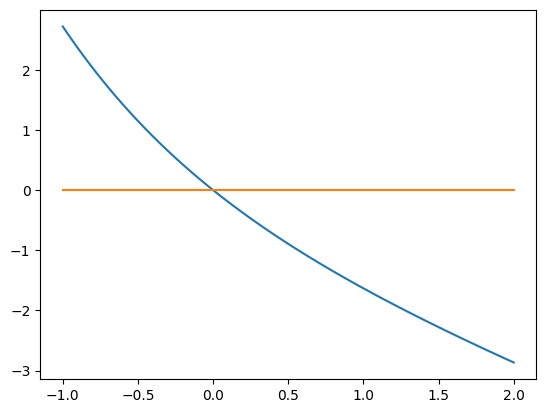

Metodo Corde:  2.2214437069136664e-13 11
Order 1.0000008781223035
Metodo Newton:  3.827482567520148e-17 4
Order 2.0030279229690002
Metodo Secanti:  4.357071583492161e-17 6
Order 1.6932950831405307


[]

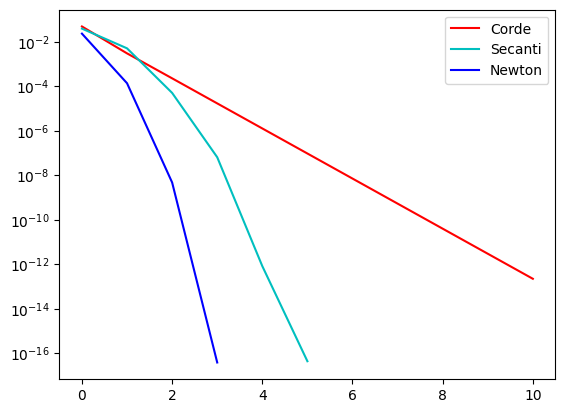

In [17]:
tolx=1e-12
tolf=1e-12
nmax=100

xx=np.linspace(a,b,100)
plt.plot(xx,f_n(xx),xx,np.zeros_like(xx))
plt.show()

x1_s,it_s,xk_s=secanti(f_n,a,b,tolx,tolf,nmax)

coeff_ang=(f_n(b)-f_n(a))/(b-a)
x1_c,it_c,xk_c=corde(f_n, x0,coeff_ang ,tolx,tolf,nmax)
print("Metodo Corde: ",x1_c,it_c)
print("Order", stima_ordine(xk_c,it_c))

x1_n,it_n,xk_n=newton(f_n,df_n,x0,tolx,tolf,nmax)
print("Metodo Newton: ",x1_n,it_n)
print("Order", stima_ordine(xk_n,it_n))

x1_s,it_s,xk_s=secanti(f_n,x0,x1,tolx,tolf,nmax)
print("Metodo Secanti: ",x1_s,it_s)
print("Order", stima_ordine(xk_s,it_s))

e_c=np.abs(np.array(xk_c)-alpha)
e_n=np.abs(np.array(xk_n)-alpha)
e_s=np.abs(np.array(xk_s)-alpha)
plt.semilogy(range(it_c),e_c,'r-', range(it_s), e_s, 'c-',range(it_n), e_n, 'b-')
plt.legend(["Corde","Secanti","Newton"])
plt.plot()

Calcolare gli zeri della funzione $f(x)=x^4-9x^2+4x+12$ definita sul'intervallo [-4,4] usando i metodi di Newton, corde e secandi, scegliendo opportunamente l'iterato iniziale per ogni metodo.

# Scrivere la function `NewtonRaphson.py`, che implementa il metodo di Newton-Raphson
per il calcolo della soluzione di un sistema di equazioni non lineari. 

Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.

In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni effettuate, nit.


Implementare in altre due function `NewtonRaphson_Corde.py` e `NewtonRaphson_Sham.py` le varianti Corde e la variante di  Shamanskii


## Esercizio 1

Risolvere i seguenti cinque sistemi non lineari con tutti e tre i metodi e confrontare in scala logaritmica l'errore relativo tra due iterati successivi

\begin{cases}
2x_{0}-\cos(x_{1})=0 \\
\sin(x_{0})+2x_{1}=0
\end{cases}

\begin{cases}
x_{0}^2+x_{1}^2-4=0\\
x_{0}^2-2x_{1}-1=0
\end{cases}

\begin{cases}
x_{0}^2+x_{1}^2-2=0\\
\exp(x_{0}-1)+x_{1}^3-3
\end{cases}

\begin{cases}
4x_{0}^2+x_{1}^{2^{-4}}=0\\
x_{0}+x_{1}-\sin(x_{0}-x_{1})=0
\end{cases}

\begin{cases}
x_{0}+x_{1}-3=0\\
x_{0}^2+x_{1}^2-9=0
\end{cases}


    1) 
    2x0-cos(x1)=0

    sin(x0)+2x1=0

    2) 
    x0^2+x1^2-4=0

    x0^2-x1*2-1=0

    3) 
    x0^2+x1^2-2=0

    exp(x0-1)+x1^3-3
    
    4) 
    4x0^2+x_1^2^-4=0

    x0+x1-sin(x0-x1)=0

    5)

    x0+x1-3=0

    x0^2+x1^2-9=0
    
    
Per determinare l'iterato iniziale X 0 , servirsi del metodo grafico per individuare un 
iterato iniziale nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=O delle due superfici z = fi (x1 ,x2 ) e z = h(x1 , x 2 ) e 
definire come iterato iniziale un vettore X 0 oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sym


       



def F_sym(f1_sym,f2_sym):
    return sym.Matrix([[f1_sym(x_sym,y_sym)], [f2_sym(x_sym,y_sym)]])   

# Calcolo della matrice Jacobiana simbolicamente
J_sym = F_sym(f1_sym,f2_sym).jacobian(sym.Matrix([x_sym, y_sym]))

# Converte la matrice jacobiana Simbolica in una funzione che può essere valutata numericamente mediante lambdify
J_numerical = lambdify([x_sym, y_sym], J_sym, np)

# Converte il vettore di funzioni Simbolico in una funzione che può essere valutata numericamente mediante lambdify
F_numerical = lambdify([x_sym, y_sym], F_sym(f1_sym,f2_sym), np)


In [ ]:
# Definizione variabili simboliche
x_sym, y_sym = sym.symbols('x_sym y_sym')

match i:
    case 0:
        2x0-cos(x1)=0
        sin(x0)+2x1=0
    case 1:
        x0^2+x1^2-4=0
        x0^2-x1*2-1=0
    case 2:
        x0^2+x1^2-2=0
        exp(x0-1)+x1^3-3
    case 3:
        4x0^2+x_1^2^-4=0
        x0+x1-sin(x0-x1)=0
    case 4:
        f1_sym = lambda x_sym,y_sym: x_sym+y_sym-3   #[-1,1]
        f2_sym = lambda x_sym,y_sym: x_sym**2+y_sym**2-9

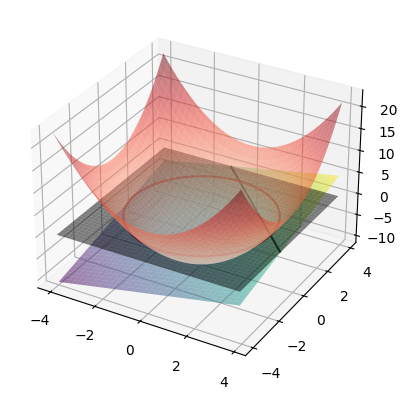

In [9]:

x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(x, y)
Z=np.zeros_like(X)
superfici=F_numerical(X,Y).squeeze()
 
# Plotta la superficie direttamente
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plotta la superficie
ax.plot_surface(X, Y, superfici[0,:,:], cmap='viridis',alpha=0.5)
# Plotta la superficie
ax.plot_surface(X, Y, superfici[1,:,:], cmap='Reds',alpha=0.5)
ax.plot_surface(X, Y, Z, cmap='gray',alpha=0.5)
plt.contour(X, Y,superfici[0,:,:], levels=[0], colors='black')
plt.contour(X, Y,superfici[1,:,:], levels=[0], colors='red')

plt.show()


In [12]:
def newton_rapshon(init_guess,f,J,tolx,tolf,nmax):
    X=np.array(init_guess)
    
    it=0
    errorf=1+tolf
    errorx=1+tolx
    error=[]

    while it<nmax and errorf>=tolf and errorx>=tolx:
        jx=J(X[0],X[1])
        if np.linalg.det(jx)==0:
            print("J-Matrix does not have max rank")
            return None,None,None
        fx=np.array(f(X[0],X[1]))
        fx=fx.squeeze()
        
        s=np.linalg.solve(jx,-fx)

        Xnew=X+s
        XnNorm=np.linalg.norm(Xnew,1)

        if XnNorm!=0:
            errorx=np.linalg.norm(s,1)/XnNorm
        else:
            errorx=np.linalg.norm(s,1)
        error.append(errorx)
        fnew=f(Xnew[0],Xnew[1])
        errorf=np.linalg.norm(fnew.squeeze(),1)

        X=Xnew
        it=it+1
    return X,it,error

# Implementare il metodo di Newton Raphson per il calcolo del minimo assoluto (relativo) di una funzione non lineare.

Calcolare il punto di minimo delle seguenti tre funzioni 
   $$\frac{1}{2}(0.001(x-1)^2+(x^2-y)^2)$$
   $$ (x - 2)^4 + (x - 2)^2 y^2+(y+1)^2$$
   $$x^4+(x+y)^2y^2+(exp(x)-1)^2$$
   $$100(y-x^2)^2+(1-x_sym)^2$$

In [10]:
x_sym,y_sym = sym.symbols('x_sym y_sym')
F_sym=100*(y_sym-x_sym**2)**2+(1-x_sym)**2

grad_f=sym.derive_by_array(F_sym, (x_sym,y_sym))
H=sym.hessian(F_sym, (x_sym,y_sym))

In [11]:
grad_f_num=sym.lambdify((x_sym,y_sym),grad_f, 'numpy')
H_num=sym.lambdify((x_sym,y_sym),H, 'numpy')
F_num=sym.lambdify((x_sym,y_sym),F_sym, 'numpy')

In [13]:
def newton_rapshon_min(init_guess,grad_f_num,H_num,tolx,tolf,nmax):
    X=np.array(init_guess)
    
    it=0
    errorf=1+tolf
    errorx=1+tolx
    error=[]

    while it<nmax and errorf>=tolf and errorx>=tolx:
        Hx=H_num(X[0],X[1])
        if np.linalg.det(Hx)==0:
            print("H-Matrix does not have max rank")
            return None,None,None
        
        gfx=grad_f_num(X[0], X[1])
        gfx=gfx.squeeze()
        
        s=np.linalg.solve(Hx,-gfx)

        Xnew=X+s
        XnNorm=np.linalg.norm(Xnew,1)
        
        # Criteri di arresto
        if XnNorm!=0:
            errorx=np.linalg.norm(s,1)/XnNorm
        else:
            errorx=np.linalg.norm(s,1)

        gradf_xnew=grad_f_num(Xnew[0],Xnew[1])
        errorf=np.linalg.norm(gradf_xnew.squeeze(),1)
        
        error.append(errorx)

        X=Xnew
        it=it+1
    return X,it,error

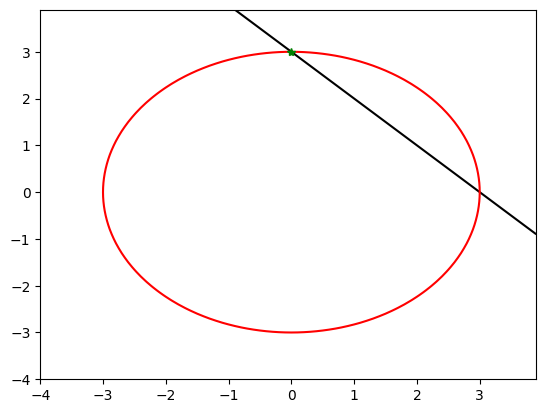

In [14]:
init_guess=[-1,3]
tolx=1e-12
tolf=1e-12
maxit=100
X_nr,it_nr,error_rn=newton_rapshon(init_guess,F_numerical,J_numerical,tolx,tolf,maxit)

plt.contour(X, Y,superfici[0,:,:], levels=[0], colors='black')
plt.contour(X, Y,superfici[1,:,:], levels=[0], colors='red')
plt.plot(X_nr[0],X_nr[1],'g*')

In [15]:
init_guess=[0.0,2.0]

tolx=1e-10
tolf=1e-10
maxIt=100

Xs_min,it,errore=newton_rapshon_min(init_guess,grad_f_num,H_num,tolx,tolf, maxIt)

print("Min: ", Xs_min, "Iterations: ", it, "Error: ", errore)

Min:  [1. 1.] Iterations:  5 Error:  [np.float64(799.0), np.float64(1.0024968906740241), np.float64(0.502200997235797), np.float64(0.0018758341873492373), np.float64(7.832652048236602e-07)]


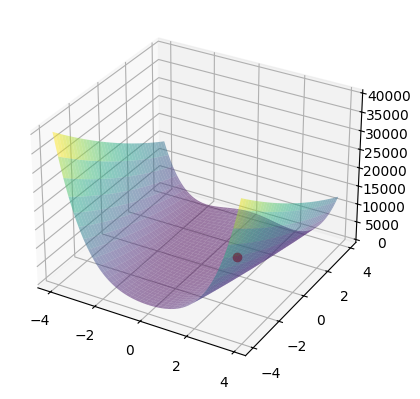

In [16]:
x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(x, y)
Z=F_num(X,Y)
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z,cmap='viridis', alpha=0.5)
plt.plot(Xs_min[0], Xs_min[1],'ro')